# Proyecto 1 - Marco Antonio Rimola De Leon - IDE09111187
Econometria 2
Trimestre 2 - 2023
Link de video: https://youtu.be/D0dSC_I-Jlg

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [344]:
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# OverallQual: Overall material and finish quality, rates the overall material and finish of the house
#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average
#       5	Average
#       4	Below Average
#       3	Fair
#       2	Poor
#       1	Very Poor
#
# 1stFlrSF: First Floor square feet
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# YearBuilt: Original construction date
# LotFrontage: Linear feet of street connected to property

data_proyecto = np.load('proyecto_training_data.npy')


In [345]:
nombres_columnas = ['SalePrice', 'OverallQual',
                    '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(data_proyecto, columns=nombres_columnas)

In [264]:
df


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [346]:
df.shape


(1460, 6)

### Slicing de dataset entrenamiento(80%) y validacion & pruebas(20%)

In [347]:
filas_totales = df.shape[0]
slicing = int(0.8 * filas_totales)
data_entrenamiento, data_prueba = np.split(df, [slicing])
print("Data de Entrenamiento:", data_entrenamiento.shape)
print("Data de Prueba:", data_prueba.shape)

Data de Entrenamiento: (1168, 6)
Data de Prueba: (292, 6)


### Analisis exploratorio de datos

In [348]:
media = data_entrenamiento.mean()
valores_max = data_entrenamiento.max()
valores_min = data_entrenamiento.min()
rangos = data_entrenamiento.max() - data_entrenamiento.min()
std_dev = data_entrenamiento.std()
for column in data_entrenamiento.columns:
    print("Variable:", column)
    print("Media:", media[column])
    print("Max:", valores_max[column])
    print("Min:", valores_min[column])
    print("Rangos:", rangos[column])
    print("Desviacion Estandar:", std_dev[column])
    print()


Variable: SalePrice
Media: 180590.27739726027
Max: 755000.0
Min: 34900.0
Rangos: 720100.0
Desviacion Estandar: 78815.69790179149

Variable: OverallQual
Media: 6.101027397260274
Max: 10.0
Min: 1.0
Rangos: 9.0
Desviacion Estandar: 1.3780252276191631

Variable: 1stFlrSF
Media: 1156.3236301369864
Max: 3228.0
Min: 334.0
Rangos: 2894.0
Desviacion Estandar: 373.7803744886528

Variable: TotRmsAbvGrd
Media: 6.4854452054794525
Max: 14.0
Min: 2.0
Rangos: 12.0
Desviacion Estandar: 1.6091407087243883

Variable: YearBuilt
Media: 1971.451198630137
Max: 2010.0
Min: 1875.0
Rangos: 135.0
Desviacion Estandar: 29.95170660645528

Variable: LotFrontage
Media: 69.94698544698545
Max: 313.0
Min: 21.0
Rangos: 292.0
Desviacion Estandar: 23.478160779049645



### Histogramas de variables

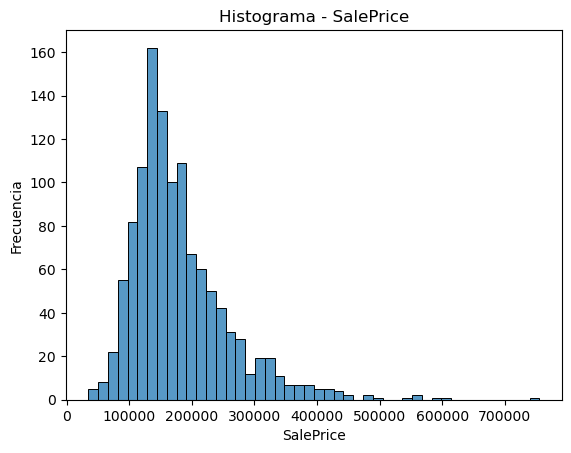

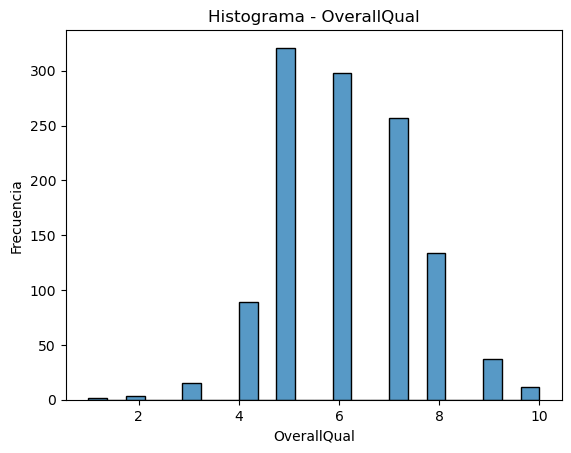

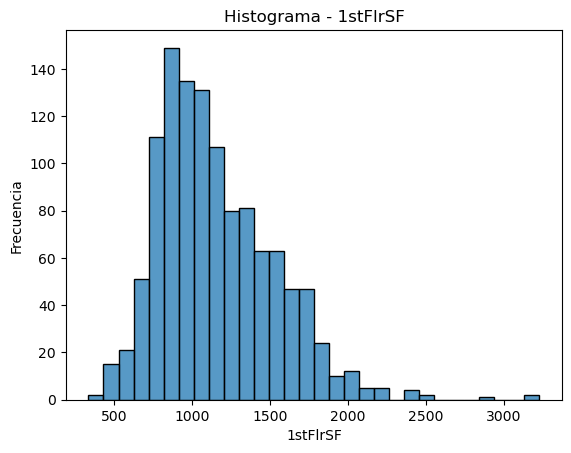

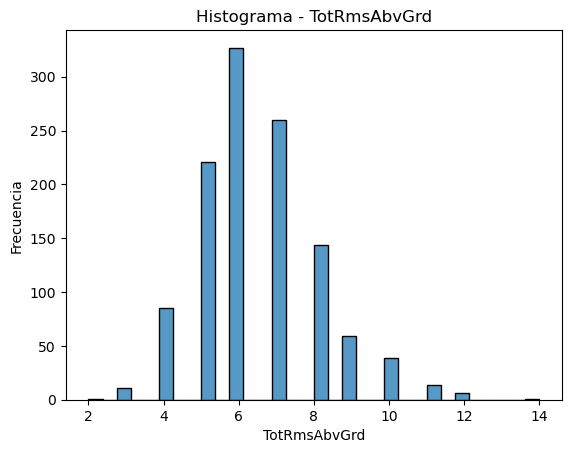

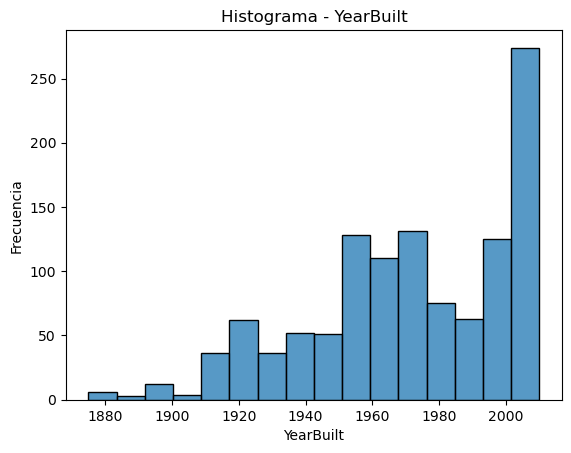

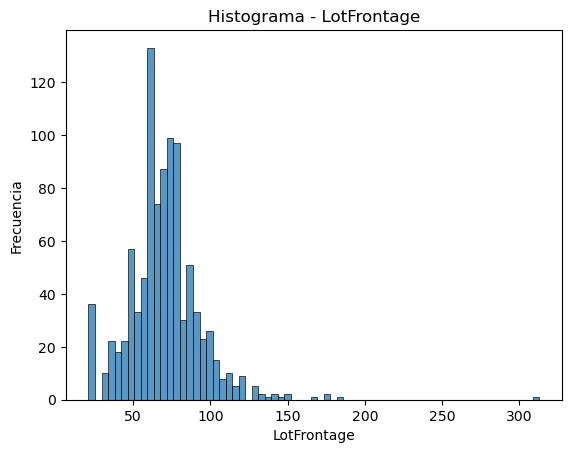

In [349]:
for column in data_entrenamiento.columns:
    sns.histplot(data=data_entrenamiento[column])
    plt.title(f"Histograma - {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()


### Coeficientes de correlacion

In [350]:
coeficiente_correl = data_entrenamiento.corr()['SalePrice']
print(coeficiente_correl)


SalePrice       1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64


### Graficas de correlacion

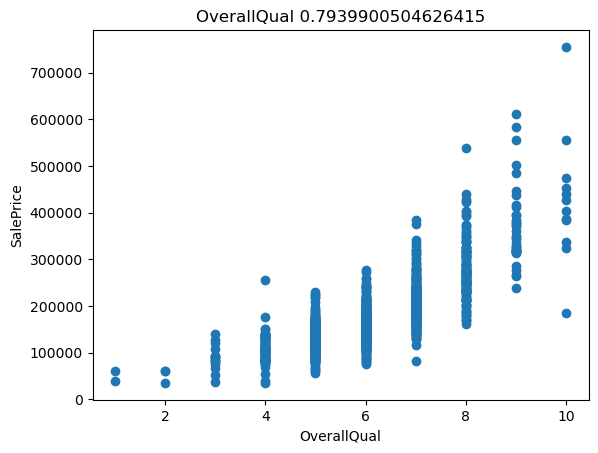

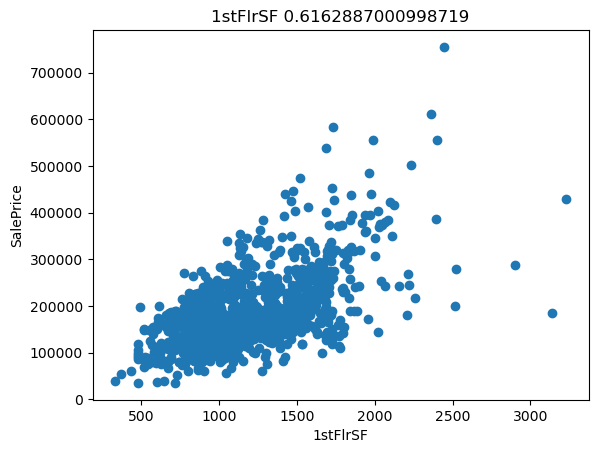

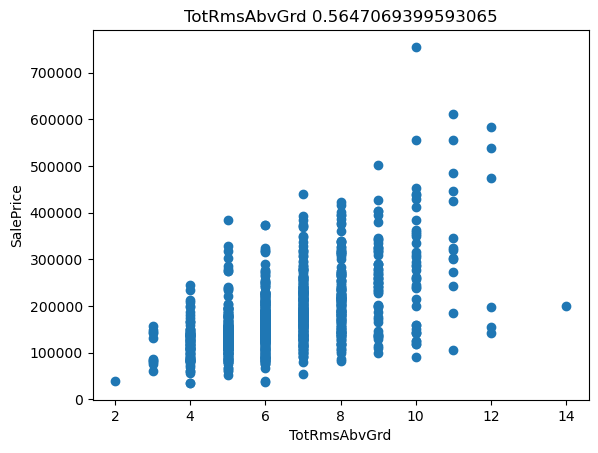

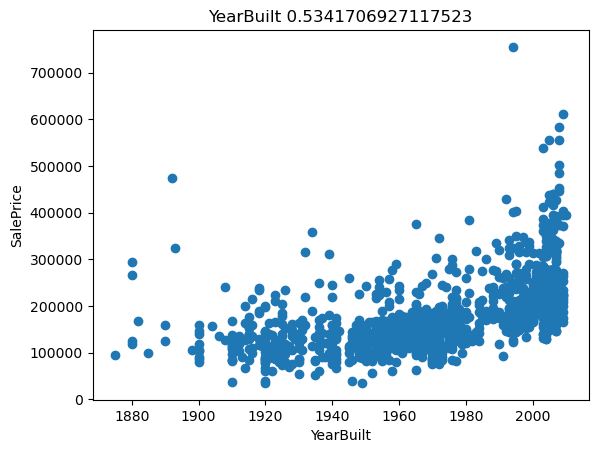

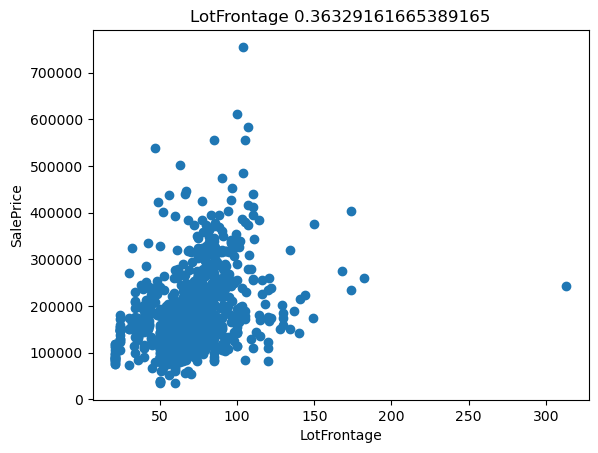

In [351]:
for column in data_entrenamiento.columns:
    if column != 'SalePrice':
        plt.scatter(data_entrenamiento[column],
                    data_entrenamiento['SalePrice'])
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.title(f'{column} {coeficiente_correl[column]}')
        plt.show()


*** Los dos variables con mas potencia predictivo son OverallQual y 1stFlrSF ***

### Modelo de regresion lineal manual

In [352]:
def train_linear_regression(x, y, epochs, imprimir_error_cada, alpha):

    X = np.column_stack((x, np.ones(len(x))))  # Vector de datos x & 1
    beta = np.zeros(2)
    error_list = []  # Vector de almacenaje de error
    modelo_lineal_manual = {}  # Almacenamiento de modelo lineal

    for epoch in range(epochs):
        y_pred = np.dot(X, beta)
        error = (1 / (2 * len(x))) * \
            np.sum((y - y_pred) ** 2)  # Error / costo usado
        # Gradiente del error
        gradient = (1 / len(x)) * np.dot(X.T, y_pred - y)
        beta -= alpha * gradient

        error_list.append(error)
        modelo_lineal_manual[epoch] = {
            'beta': beta.copy(),
            'y_pred': y_pred.copy()
        }

        if (epoch + 1) % imprimir_error_cada == 0 or epoch == epochs - 1:
            print("Iteración:", epoch + 1, "| Error:", error)

    beta0, beta1 = beta[1], beta[0]

    return modelo_lineal_manual, error_list


#### Grafica de cambio en error

Iteración: 100 | Error: 18035298483.519104
Iteración: 200 | Error: 16753414063.966408
Iteración: 300 | Error: 15570274407.977097
Iteración: 400 | Error: 14478272974.550877
Iteración: 500 | Error: 13470389172.414845
Iteración: 600 | Error: 12540143222.93903
Iteración: 700 | Error: 11681554500.067759
Iteración: 800 | Error: 10889103079.423885
Iteración: 900 | Error: 10157694249.37593
Iteración: 1000 | Error: 9482625755.901104
Iteración: 1100 | Error: 8859557570.653503
Iteración: 1200 | Error: 8284483987.86905
Iteración: 1300 | Error: 7753707870.711397
Iteración: 1400 | Error: 7263816881.482367
Iteración: 1500 | Error: 6811661542.875063
Iteración: 1600 | Error: 6394334989.220291
Iteración: 1700 | Error: 6009154277.541997
Iteración: 1800 | Error: 5653643138.266027
Iteración: 1900 | Error: 5325516054.68234
Iteración: 2000 | Error: 5022663568.803629
Iteración: 2100 | Error: 4743138719.14823
Iteración: 2200 | Error: 4485144523.252406
Iteración: 2300 | Error: 4247022424.4342275
Iteración: 2400

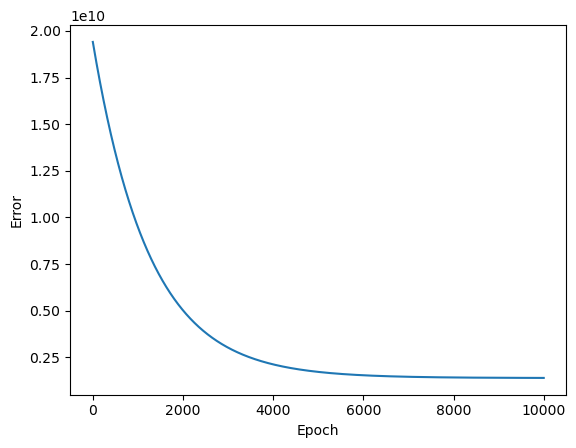

In [355]:
x_Overall_Qual = data_entrenamiento['OverallQual']
y = data_entrenamiento['SalePrice']

epochs = 10000
imprimir_error_cada = 100
alpha = 0.00001

modelo_lineal_manual, error_list = train_linear_regression(
    x_Overall_Qual, y, epochs, imprimir_error_cada, alpha)

plt.plot(error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


Iteración: 10 | Error: 15312212999.924818
Iteración: 20 | Error: 11878030861.591663
Iteración: 30 | Error: 9327654251.802912
Iteración: 40 | Error: 7433630990.968671
Iteración: 50 | Error: 6027044960.124736
Iteración: 60 | Error: 4982451526.041487
Iteración: 70 | Error: 4206689916.954777
Iteración: 80 | Error: 3630574794.502554
Iteración: 90 | Error: 3202726044.999331
Iteración: 100 | Error: 2884986507.6241245
Iteración: 110 | Error: 2649018975.284907
Iteración: 120 | Error: 2473778975.895717
Iteración: 130 | Error: 2343637947.194275
Iteración: 140 | Error: 2246989422.7703953
Iteración: 150 | Error: 2175213923.7321544
Iteración: 160 | Error: 2121910241.1549163
Iteración: 170 | Error: 2082324552.190392
Iteración: 180 | Error: 2052926456.262844
Iteración: 190 | Error: 2031094120.6656473
Iteración: 200 | Error: 2014880455.6581118
Iteración: 210 | Error: 2002839465.6781585
Iteración: 220 | Error: 1993897290.0187762
Iteración: 230 | Error: 1987256431.8906884
Iteración: 240 | Error: 19823246

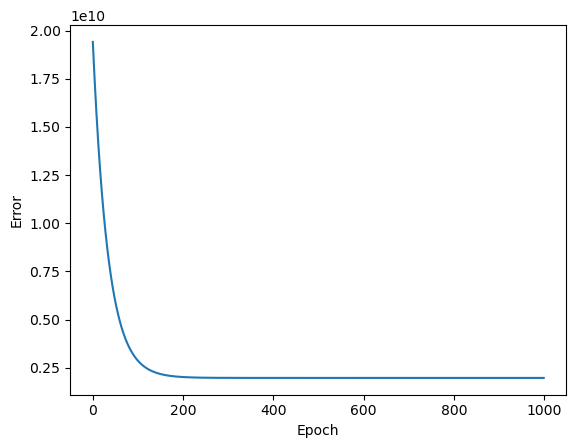

In [354]:
x_1FSF = data_entrenamiento['1stFlrSF']
y = data_entrenamiento['SalePrice']

epochs = 1000
imprimir_error_cada = 10
alpha = 0.00000001

modelo_lineal_manual, error_list = train_linear_regression(
    x_1FSF, y, epochs, imprimir_error_cada, alpha)

plt.plot(error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


#### Grafica de evolucion del modelo de entrenamiento manual

In [356]:
def evolucion_modelo(modelo_lineal_manual, x, y, n):
    num_plots = len(range(n, len(modelo_lineal_manual) + 1, n))
    fig, axs = plt.subplots(num_plots, figsize=(10, num_plots * 5))

    for i, iteration in enumerate(range(n, len(modelo_lineal_manual) + 1, n)):
        beta = modelo_lineal_manual[iteration - 1]
        y_pred = beta['y_pred']
        axs[i].scatter(x, y, color='blue')
        axs[i].plot(x, y_pred, color='red')
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].set_title(f'Iteracion {iteration}')

    plt.tight_layout()
    plt.show()


#### Funcion de entrenamiento manual

Iteración: 1000 | Error: 9482625755.901104
Iteración: 2000 | Error: 5022663568.803629
Iteración: 3000 | Error: 3021770073.4105344
Iteración: 4000 | Error: 2124028947.4528415
Iteración: 5000 | Error: 1721168391.3539386
Iteración: 6000 | Error: 1540314204.71533
Iteración: 7000 | Error: 1459053464.0156417
Iteración: 8000 | Error: 1422471033.120731
Iteración: 9000 | Error: 1405931668.482403
Iteración: 10000 | Error: 1398383859.1533499


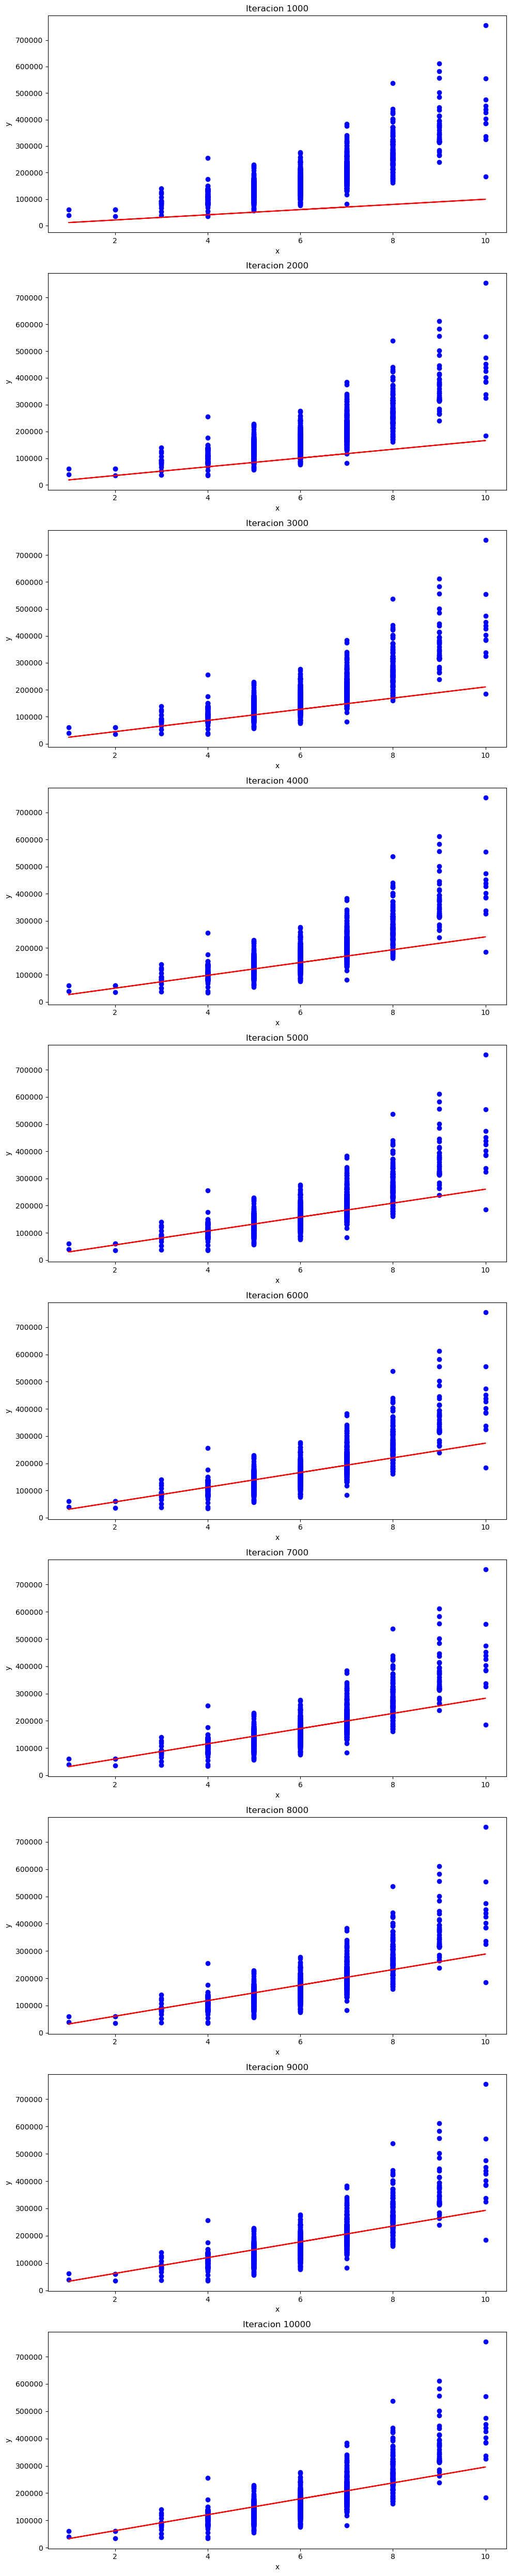

In [359]:
x = data_entrenamiento['OverallQual'].values
y = data_entrenamiento['SalePrice'].values
modelo_lineal_manual, _ = train_linear_regression(x, y, 10000, 1000, 0.00001)

evolucion_modelo(modelo_lineal_manual, x, y, 1000)


Iteración: 100 | Error: 2884986507.6241245
Iteración: 200 | Error: 2014880455.6581118
Iteración: 300 | Error: 1970480536.2669008
Iteración: 400 | Error: 1968214882.2394938
Iteración: 500 | Error: 1968099262.2831829
Iteración: 600 | Error: 1968093354.6113281
Iteración: 700 | Error: 1968093045.3555748
Iteración: 800 | Error: 1968093021.7767007
Iteración: 900 | Error: 1968093012.775394
Iteración: 1000 | Error: 1968093004.517955
Iteración: 1100 | Error: 1968092996.2984753
Iteración: 1200 | Error: 1968092988.080935
Iteración: 1300 | Error: 1968092979.863494
Iteración: 1400 | Error: 1968092971.6460605
Iteración: 1500 | Error: 1968092963.4286284
Iteración: 1600 | Error: 1968092955.2111983
Iteración: 1700 | Error: 1968092946.9937694
Iteración: 1800 | Error: 1968092938.776342
Iteración: 1900 | Error: 1968092930.5589159
Iteración: 2000 | Error: 1968092922.3414917
Iteración: 2100 | Error: 1968092914.124069
Iteración: 2200 | Error: 1968092905.906648
Iteración: 2300 | Error: 1968092897.689228
Itera

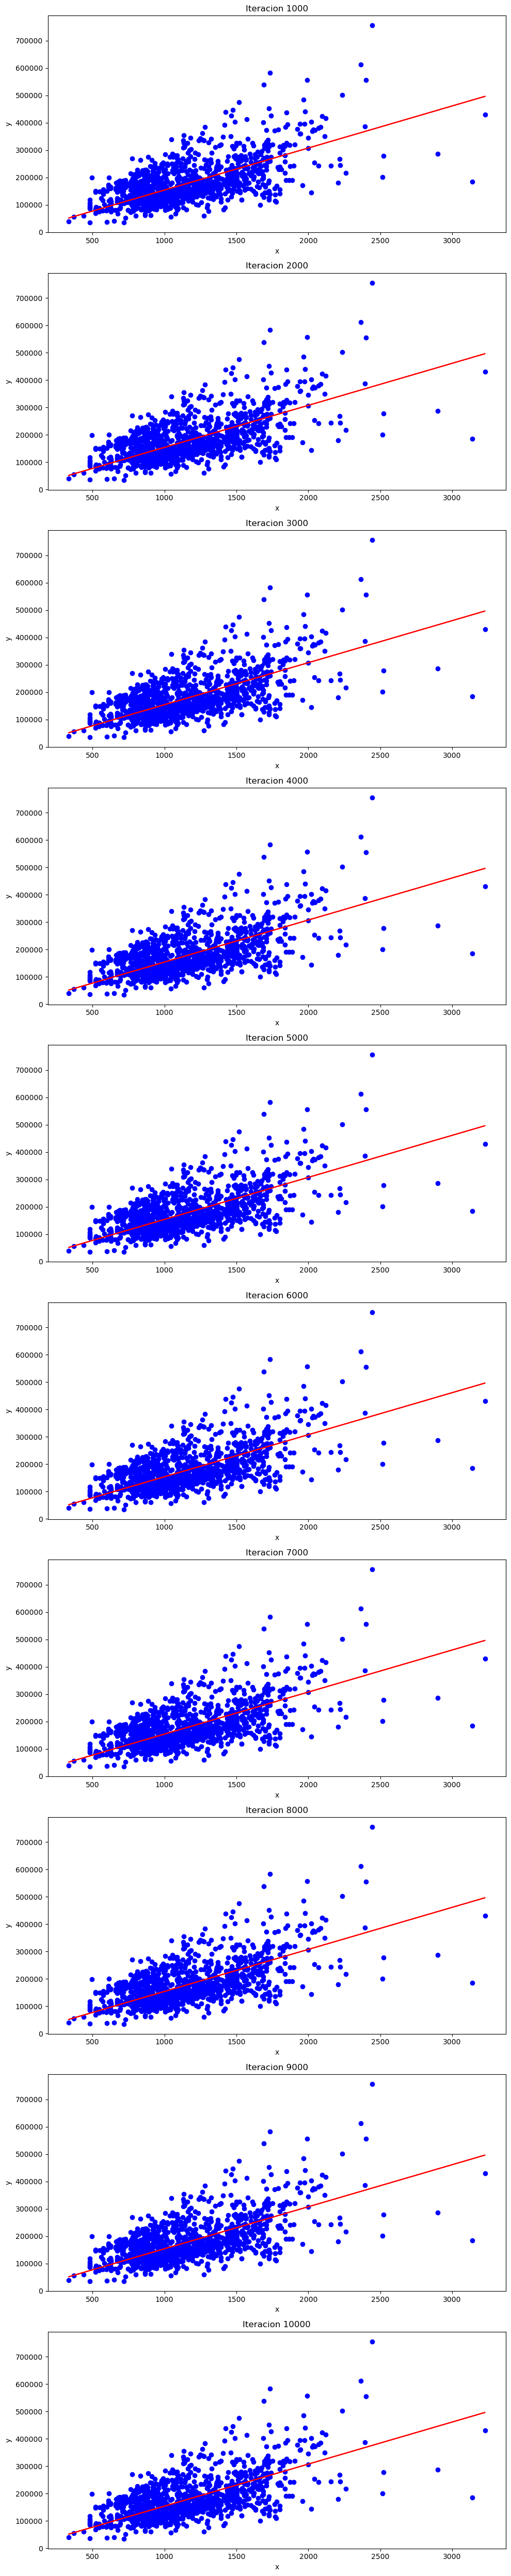

In [358]:
x = data_entrenamiento['1stFlrSF'].values
y = data_entrenamiento['SalePrice'].values
modelo_lineal_manual, _ = train_linear_regression(
    x, y, 10000, 100, 0.00000001)

evolucion_modelo(modelo_lineal_manual, x, y, 1000)


### Modelo de regresion lineal SKLearn


Para la variable 1stFlrSF, los parametros del modelo de regresion lineal son:
beta_0: 30324.585174963693
beta_1: [129.95124229]
R squared: 0.37981176187078936


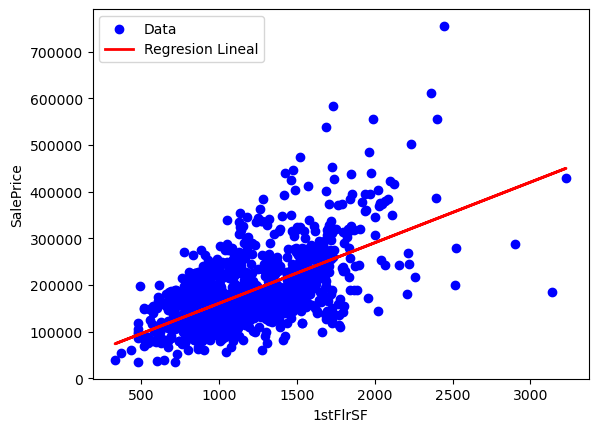


Para la variable OverallQual, los parametros del modelo de regresion lineal son:
beta_0: -96469.57131873982
beta_1: [45411.99877916]
R squared: 0.6304202002336672


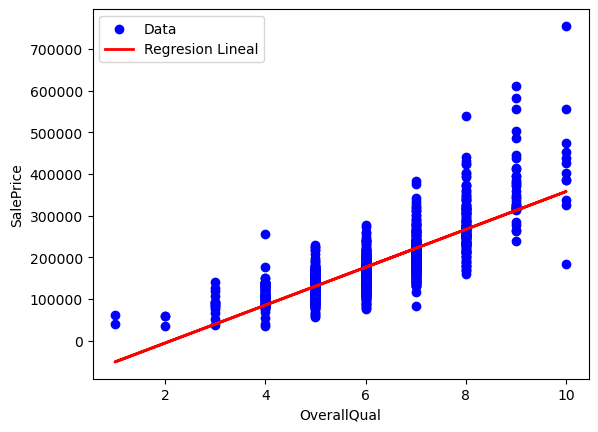

In [361]:
x_column_names = ['1stFlrSF', 'OverallQual']
y_column_name = 'SalePrice'

for x_column_name in x_column_names:
    x_values = data_entrenamiento[[x_column_name]]
    y_values = data_entrenamiento[y_column_name]

    modelo_sklearn = LinearRegression()
    modelo_sklearn.fit(x_values, y_values)

    print(
        f"\nPara la variable {x_column_name}, los parametros del modelo de regresion lineal son:")
    print(f"beta_0: {modelo_sklearn.intercept_}")
    print(f"beta_1: {modelo_sklearn.coef_}")

    y_pred = modelo_sklearn.predict(x_values)

    score = modelo_sklearn.score(x_values, y_values)
    print(f"R squared: {score}")

    plt.scatter(x_values, y_values, color='blue', label='Data')
    plt.plot(x_values, y_pred, color='red',
             linewidth=2, label='Regresion Lineal')
    plt.xlabel(x_column_name)
    plt.ylabel(y_column_name)
    plt.legend()
    plt.show()

    modelo_lineal_sklearn[x_column_name] = {
        'model': modelo_sklearn,
        'predictions': modelo_sklearn.predict(x_values)
    }


### Comparacion de modelos & modelo combinado

In [362]:
def calcular_predicciones(x, modelo_lineal_manual, modelo_lineal_sklearn, epoch):
    y_pred = modelo_lineal_manual[9999]['y_pred']
    prediccion_manual = y_pred
    prediccion_sklearn = modelo_lineal_sklearn['OverallQual']['predictions']
    prediccion_combinada = (prediccion_manual + prediccion_sklearn) / 2

    return prediccion_manual, prediccion_sklearn, prediccion_combinada


In [363]:
pred_manual, pred_sklearn, pred_combinada = calcular_predicciones(
    x, modelo_lineal_manual, modelo_lineal_sklearn, 9999)


In [364]:
y_true = data_entrenamiento['SalePrice'].values
y_pred_manual = pred_manual.flatten() 
r2_manual = r2_score(y_true, y_pred_manual)
mse_manual = mean_squared_error(y_true, y_pred_manual)

y_pred_sklearn = pred_sklearn
r2_sklearn = r2_score(y_true, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_true, y_pred_sklearn)
y_pred_combinada = pred_combinada
r2_combinada = r2_score(y_true, y_pred_combinada)
mse_combinada = mean_squared_error(y_true, y_pred_combinada)

print("Indicadores para el modelo manual:")
print("R-squared:", r2_manual)
print("MSE:", mse_manual)

print("\nIndicadores para el modelo SKLearn:")
print("R-squared:", r2_sklearn)
print("Mean Squared Error:", mse_sklearn)

print("\nIndicadores para el modelo Combinado:")
print("R-squared:", r2_combinada)
print("Mean Squared Error:", mse_combinada)


Indicadores para el modelo manual:
R-squared: 0.5493878123840359
MSE: 2796767718.3066998

Indicadores para el modelo SKLearn:
R-squared: 0.6304202002336672
Mean Squared Error: 2293832438.916738

Indicadores para el modelo Combinado:
R-squared: 0.6101621032712593
Mean Squared Error: 2419566258.764229


### Validacion de datos y modelos contra prueba

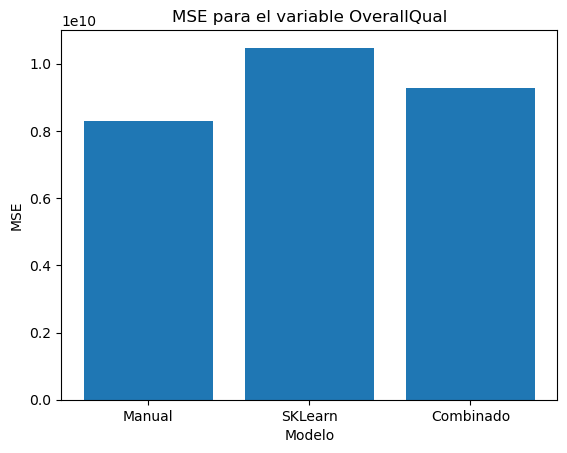

El mejor modelo para el variable OverallQual es: Manual


In [365]:
mse_dict = {}

x_column_name = 'OverallQual'

x_values = data_prueba[x_column_name].values

# Modelo Manual
y_pred_manual = modelo_lineal_manual[9999]['y_pred'][:len(y_val)]
mse_manual = mean_squared_error(y_val, y_pred_manual)
mse_dict[x_column_name] = {'Manual': mse_manual}

# Modelo Scikit
y_pred_sklearn = modelo_lineal_sklearn[x_column_name]['predictions'][:len(y_val)]
mse_sklearn = mean_squared_error(y_val, y_pred_sklearn)
mse_dict[x_column_name]['SKLearn'] = mse_sklearn

# Modelo combinado
y_pred_combinada = pred_combinada[:len(y_val)]
mse_combinada = mean_squared_error(y_val, y_pred_combinada)
mse_dict[x_column_name]['Combinado'] = mse_combinada

# MSE por modelo
models = list(mse_dict[x_column_name].keys())
mse_values = list(mse_dict[x_column_name].values())
plt.bar(models, mse_values)
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title(f'MSE para el variable {x_column_name}')
plt.show()

mejor_modelo = min(mse_dict[x_column_name], key=mse_dict[x_column_name].get)

print(f"El mejor modelo para el variable {x_column_name} es: {mejor_modelo}")
